In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

1) we suppose 
- hardware unique
- cuboid_name unique
- buffer_size unique
    
If this condition fails then error is thrown 
    
2) we try to print even if a test has failed, but we inform that this test failed

In [3]:
results_dir = '/home/user/Documents/workspace/bigdataneurolab/thesis/optimization_project/dask_io_experiments/tmp_dir/exp1'
results_path = os.path.join(results_dir, "exp1_boundmem.csv")
csv_data = pd.read_csv(results_path)
csv_data.head()

,hardware,cuboid_name,array_shape,chunk_type,chunk_shape,optimized,buffer_size,nthreads,processing_time_split,processing_time_merge,diagnostics_split,diagnostics_merge,monitor_split,monitor_merge,success_run_split,success_run_merge
0,ssd,big,"(3500, 3500, 3500)",blocks,"(500, 500, 500)",False,15000000000,NaN,3707.9696,801.1590,/home/gtimothee/outputs/24a2c0d0-e9b9-4ce5-b08...,/home/gtimothee/outputs/24a2c0d0-e9b9-4ce5-b08...,/home/gtimothee/outputs/24a2c0d0-e9b9-4ce5-b08...,/home/gtimothee/outputs/24a2c0d0-e9b9-4ce5-b08...,True,True
1,ssd,big,"(3500, 3500, 3500)",blocks,"(875, 875, 875)",True,15000000000,1.0,3598.6934,682.1119,/home/gtimothee/outputs/dce0bf4f-3416-41f3-8ee...,/home/gtimothee/outputs/dce0bf4f-3416-41f3-8ee...,/home/gtimothee/outputs/dce0bf4f-3416-41f3-8ee...,/home/gtimothee/outputs/dce0bf4f-3416-41f3-8ee...,True,True
2,ssd,big,"(3500, 3500, 3500)",slabs,"(28, 3500, 3500)",False,15000000000,NaN,3571.0658,531.4099,/home/gtimothee/outputs/047a2765-c9e1-49f0-b7f...,/home/gtimothee/outputs/047a2765-c9e1-49f0-b7f...,/home/gtimothee/outputs/047a2765-c9e1-49f0-b7f...,/home/gtimothee/outputs/047a2765-c9e1-49f0-b7f...,True,True
3,ssd,big,"(3500, 3500, 3500)",slabs,"(28, 3500, 3500)",True,15000000000,1.0,3577.4051,532.0452,/home/gtimothee/outputs/cb65062e-ffc0-4178-b46...,/home/gtimothee/outputs/cb65062e-ffc0-4178-b46...,/home/gtimothee/outputs/cb65062e-ffc0-4178-b46...,/home/gtimothee/outputs/cb65062e-ffc0-4178-b46...,True,True
4,ssd,big,"(3500, 3500, 3500)",blocks,"(875, 875, 875)",False,15000000000,NaN,3648.0422,784.8303,/home/gtimothee/outputs/40c04f3c-a31d-4e37-abe...,/home/gtimothee/outputs/40c04f3c-a31d-4e37-abe...,/home/gtimothee/outputs/40c04f3c-a31d-4e37-abe...,/home/gtimothee/outputs/40c04f3c-a31d-4e37-abe...,True,True


In [4]:
csv_data = csv_data.drop(columns=["array_shape", "nthreads", "diagnostics_split", "diagnostics_merge", "monitor_split", "monitor_merge"])
csv_data.head()

,hardware,cuboid_name,chunk_type,chunk_shape,optimized,buffer_size,processing_time_split,processing_time_merge,success_run_split,success_run_merge
0,ssd,big,blocks,"(500, 500, 500)",False,15000000000,3707.9696,801.1590,True,True
1,ssd,big,blocks,"(875, 875, 875)",True,15000000000,3598.6934,682.1119,True,True
2,ssd,big,slabs,"(28, 3500, 3500)",False,15000000000,3571.0658,531.4099,True,True
3,ssd,big,slabs,"(28, 3500, 3500)",True,15000000000,3577.4051,532.0452,True,True
4,ssd,big,blocks,"(875, 875, 875)",False,15000000000,3648.0422,784.8303,True,True


In [5]:
hardware = csv_data.iloc[0]["hardware"]
cuboid_name = csv_data.iloc[0]["cuboid_name"]
buffer_size = csv_data.iloc[0]["buffer_size"]

if not (csv_data['hardware'] == hardware).all():
    raise ValueError()
if not (csv_data['cuboid_name'] == cuboid_name).all():
    raise ValueError()
if not (csv_data['buffer_size'] == buffer_size).all():
    raise ValueError()
if not (csv_data['success_run_split'] == True).all():
    print("WARNING - At least one split run has failed !")
    csv_data.loc[csv_data['success_run_split'] == True]
if not (csv_data['success_run_merge'] == True).all():
    print("WARNING - At least one merge run has failed !")
    csv_data.loc[csv_data['success_run_merge'] == True]

In [6]:
csv_data = csv_data.drop(columns=["hardware", 
                                  "cuboid_name", 
                                  "buffer_size", 
                                  "success_run_split", 
                                  "success_run_merge"])

In [7]:
csv_data

,chunk_type,chunk_shape,optimized,processing_time_split,processing_time_merge
0,blocks,"(500, 500, 500)",False,3707.9696,801.1590
1,blocks,"(875, 875, 875)",True,3598.6934,682.1119
2,slabs,"(28, 3500, 3500)",False,3571.0658,531.4099
3,slabs,"(28, 3500, 3500)",True,3577.4051,532.0452
4,blocks,"(875, 875, 875)",False,3648.0422,784.8303
5,blocks,"(350, 350, 350)",False,3806.3569,2295.7497
6,blocks,"(500, 500, 500)",True,3610.0539,806.1543
7,blocks,"(350, 350, 350)",True,3632.4541,2328.7523
8,slabs,"(50, 3500, 3500)",True,3558.5605,528.1088
9,slabs,"(50, 3500, 3500)",False,3548.0992,533.7815


In [8]:
csv_data = csv_data.sort_values(["chunk_type", "chunk_shape", "optimized"])
csv_data

,chunk_type,chunk_shape,optimized,processing_time_split,processing_time_merge
5,blocks,"(350, 350, 350)",False,3806.3569,2295.7497
7,blocks,"(350, 350, 350)",True,3632.4541,2328.7523
0,blocks,"(500, 500, 500)",False,3707.9696,801.1590
6,blocks,"(500, 500, 500)",True,3610.0539,806.1543
4,blocks,"(875, 875, 875)",False,3648.0422,784.8303
1,blocks,"(875, 875, 875)",True,3598.6934,682.1119
2,slabs,"(28, 3500, 3500)",False,3571.0658,531.4099
3,slabs,"(28, 3500, 3500)",True,3577.4051,532.0452
9,slabs,"(50, 3500, 3500)",False,3548.0992,533.7815
8,slabs,"(50, 3500, 3500)",True,3558.5605,528.1088


In [9]:
csv_data_opti = csv_data.loc[csv_data["optimized"]==True]
csv_data_noopti = csv_data.loc[csv_data["optimized"]==False]

csv_data_split_opti = csv_data_opti["processing_time_split"]
csv_data_merge_opti = csv_data_opti["processing_time_merge"]
csv_data_split_noopti = csv_data_noopti["processing_time_split"]
csv_data_merge_noopti = csv_data_noopti["processing_time_merge"]

In [10]:
labels_names = csv_data["chunk_shape"].unique()
nb_labels = len(labels_names)
labels = np.arange(nb_labels) + 1
labels = ["case " + str(i) for i in labels]
labels

['case 1', 'case 2', 'case 3', 'case 4', 'case 5']

In [11]:
x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

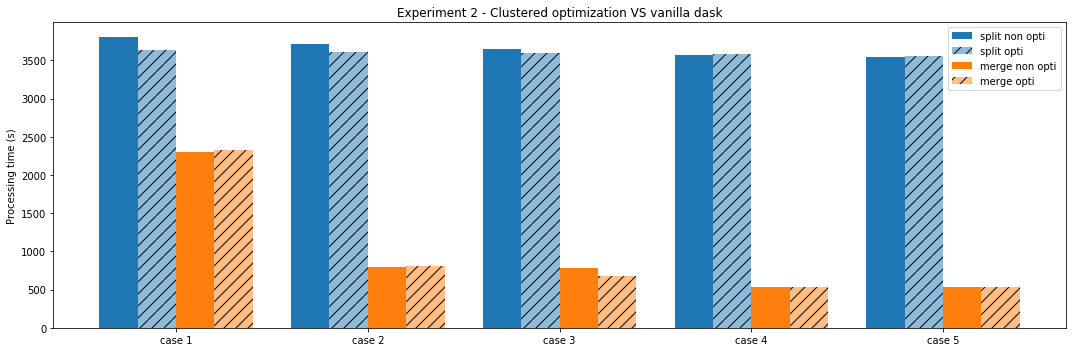

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - 3*width/2, csv_data_split_noopti, width, label='split non opti', color=['tab:blue'])
rects2 = ax.bar(x - width/2, csv_data_split_opti, width, label='split opti', color=['tab:blue'], hatch='//', alpha=0.5)
rects3 = ax.bar(x + width/2, csv_data_merge_noopti, width, label='merge non opti', color=['tab:orange'])
rects4 = ax.bar(x + 3*width/2, csv_data_merge_opti, width, label='merge opti', color=['tab:orange'], hatch='//', alpha=0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Processing time (s)')
ax.set_title('Experiment 2 - Clustered optimization VS vanilla dask')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [13]:
for l, n in zip(labels, labels_names):
    print(l, n)

case 1 (350, 350, 350)
case 2 (500, 500, 500)
case 3 (875, 875, 875)
case 4 (28, 3500, 3500)
case 5 (50, 3500, 3500)
